Задание 1: Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.
Вариант 8:
Z = $\frac {x - 3y - 3} {x^2 + 2y^2 + 1}$
x = -5 -3 -2 -1
y = -1 -2 0 1

In [1]:
#функция качества хромосомы
def qZ(x, y):
  return (x - 3 * y - 3) / (x ** 2 + 2 * y ** 2 + 1)

#сумма качества хромосомы
def qSumZ(Z):
  return sum(Z)

#схема обмена хромосомами
def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range(4)]
  Y = [0 for i in range(4)]
  X[2] = oldX[sortedId[2]]
  X[3] = oldX[sortedId[2]]
  X[0] = oldX[sortedId[0]]
  X[1] = oldX[sortedId[1]]
  Y[0] = oldY[sortedId[2]]
  Y[1] = oldY[sortedId[2]]
  Y[2] = oldY[sortedId[0]]
  Y[3] = oldY[sortedId[1]]
  return X, Y

#сортировка массива качества и выделение индексов
def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda x: Z[x])
  return sortedId

#шаг эволюции
def evoStep(X, Y, Z):
  _, minId = min((value, id) for id, value in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]
  X.pop(minId)
  Y.pop(minId)
  Z.pop(minId)
  return X, Y, Z

#шаги эволюции (конечная функция)
def evoSteps(X, Y, stepsNum=4):
  results = []
  for i in range(4):
    arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
    X, Y, Z = evoStep(X, Y, arrZ)
    X, Y = exchangeScheme(X, Y, sorting(Z))
    results.append([X, Y, qSumZ(arrZ), arrZ])
  return X, Y, results

#основная функция
X = [-1, 0, 2, 3]
Y = [-2, 1, 0, -1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
  print(f"max_{i + 1}_step: {round(results[2][i][2], 2)}")
qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
print(f"max_Z: {round(max(qualityArrZ), 2)}")

max_1_step: -1.75
max_2_step: 0.37
max_3_step: 0.97
max_4_step: 1.34
max_Z: 0.38


Задание 2: найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже. Вариант 8.

Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута: 139
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


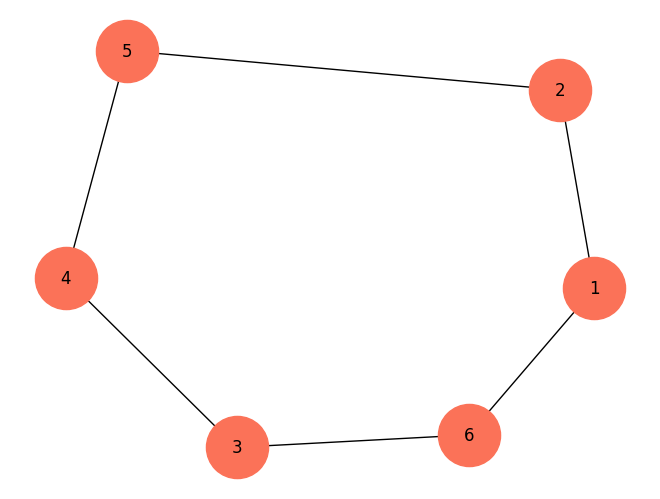

In [2]:
import networkx as nx
from math import e

distances = [(1, 2, 19), (1, 3, 39), (1, 4, 35), (1, 5, 26), (1, 6, 18),
             (2, 3, 26), (2, 4, 33), (2, 5, 37), (2, 6, 14), (3, 4, 22),
             (3, 5, 41), (3, 6, 21), (4, 5, 22), (4, 6, 19), (5, 6, 24)] #длины ребер
V = [1, 4, 2, 3, 5, 6, 1] #последовательность прохождения маршрута
Z = [(5, 2), (4, 5), (2, 3), (3, 4)] #последовательость замены вершин
P = [88, 54, 24, 64] #случайные числа, выповшие в процессе счета
T = 100 #начальная температура

#функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
  nextT = 0.5 * prevT
  return nextT

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

#вычисление длины маршрута
def routeLength(V, distances):
  edges = []
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV

#перестановка в пути
def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) #нахождение длины пути
  arrSum = [sumLength] #массив сумм длин
  #циклы методом отжига
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
    newS = routeLength(newV, distances) #длина нового маршрута
    arrSum.append(newS)
    deltaS = newS - sumLength
    if deltaS > 0:
      p = probability(deltaS, T) #подсчет вероятности
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T) #вычисление температуры
  return V, arrSum

#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  #прохождение по вектору
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph() #создание пустого графа
  graph.add_weighted_edges_from(newDistances) #добавление весов ребер
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True) #отрисовка графа с заданными вершинами

#основная функция
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута

Задание 3: на решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

Лучший выбранный маршрут: [1, 2, 4, 5, 3, 6, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


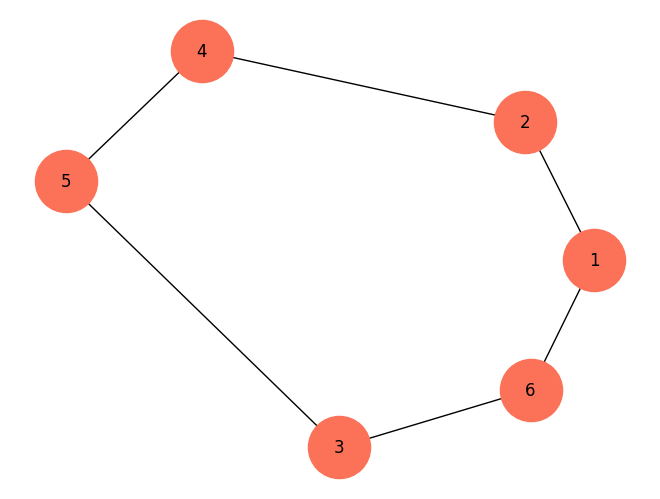

In [3]:
import networkx as nx
from math import e

distances = [(1, 2, 19), (1, 3, 39), (1, 4, 35), (1, 5, 26), (1, 6, 18),
             (2, 3, 26), (2, 4, 33), (2, 5, 37), (2, 6, 14), (3, 4, 22),
             (3, 5, 41), (3, 6, 21), (4, 5, 22), (4, 6, 19), (5, 6, 24)] #длины ребер
V = [1, 4, 2, 3, 5, 6, 1] #последовательность прохождения маршрута
Z = [(5, 2), (4, 5), (2, 3), (3, 4)] #последовательость замены вершин
P = [90, 25, 70, 20] #случайные числа, выповшие в процессе счета
T = 100 #начальная температура

#функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
  nextT = 0.5 * prevT
  return nextT

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

#вычисление длины маршрута
def routeLength(V, distances):
  edges = []
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV

#перестановка в пути
def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) #нахождение длины пути
  arrSum = [sumLength] #массив сумм длин
  #циклы методом отжига
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
    newS = routeLength(newV, distances) #длина нового маршрута
    arrSum.append(newS)
    deltaS = newS - sumLength
    if deltaS > 0:
      p = probability(deltaS, T) #подсчет вероятности
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T) #вычисление температуры
  return V, arrSum

#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  #прохождение по вектору
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph() #создание пустого графа
  graph.add_weighted_edges_from(newDistances) #добавление весов ребер
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True) #отрисовка графа с заданными вершинами

#основная функция
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута